Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np


Step 2: Load the Dataset

In [2]:
# Load the dataset
file_path = 'final_adjusted_crowd_dataset.csv'  # Update with actual file path
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())


   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.282934      352 -0.036306 -0.008226 -0.023416      0  
1  0.108889      352  0.035776 -0.009448  0.009570      0  
2 -0.534985      352 -0.011871 -0.027774  0.003462      0  
3 -0.350396      352 -0.017980  0.002769 -0.005091      0  
4 -0.494085      352  0.011342  0.003380  0.006516      0  


Step 3: Check for Missing Values

In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

Missing values in each column:
Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64

Percentage of missing values in each column:
Longitude    0.0
Latitude     0.0
Speed        0.0
Distance     0.0
Time         0.0
Acc X        0.0
Acc Y        0.0
Acc Z        0.0
Heading      0.0
gyro_x       0.0
gyro_y       0.0
gyro_z       0.0
label        0.0
dtype: float64


Their are no mising values but if their were we can do this

Step 4: Handle Missing Values
we can handle missing values in various ways. Below are a few options:

1.Remove Rows with Missing Values:




In [4]:
# Remove rows with missing values
df_cleaned = df.dropna()
print(f"Shape of the dataset after dropping missing values: {df_cleaned.shape}")


Shape of the dataset after dropping missing values: (14249, 13)


2.Impute Missing Values with Mean/Median (useful for numeric data):

In [8]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Impute missing values in numeric columns with the column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("Missing values in numeric columns have been imputed with the mean.")

Missing values in numeric columns have been imputed with the mean.


3.Impute Missing Values with Forward/Backward Fill (useful for time-series data):

In [9]:
   # Forward fill missing values
df.fillna(method='ffill', inplace=True)

# Backward fill missing values
df.fillna(method='bfill', inplace=True)


<ipython-input-9-be21b6e49171>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-9-be21b6e49171>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Step 5: Save the Cleaned Dataset

Once the data is loaded, cleaned, and formatted, you can save the cleaned dataset for future use.

In [15]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


TASK **1**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

2.Load the Dataset

Assume that your dataset contains time-series data from smartphone sensors, with columns such as timestamp, accelerometer readings (acc_x, acc_y, acc_z), gyroscope readings (gyro_x, gyro_y, gyro_z), and possibly GPS coordinates (lat, lon).

In [19]:
# Load dataset
data = pd.read_csv('final_adjusted_crowd_dataset.csv')

# Display the first few rows
print(data.head())


   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.282934      352 -0.036306 -0.008226 -0.023416      0  
1  0.108889      352  0.035776 -0.009448  0.009570      0  
2 -0.534985      352 -0.011871 -0.027774  0.003462      0  
3 -0.350396      352 -0.017980  0.002769 -0.005091      0  
4 -0.494085      352  0.011342  0.003380  0.006516      0  


**3.Suggest New Features**

Based on the dataset columns, consider the following new features:

Speed Changes: The change in speed between consecutive points.
Sudden Stops: Instances where speed drops significantly (e.g., by more than a threshold).
Direction Changes: Changes in heading between consecutive points.
Total Acceleration: Magnitude of acceleration calculated from X, Y, and Z components.
Distance Traveled: Calculate the distance traveled using GPS coordinates.

**4. Implement Feature Engineering**

a. Calculate Speed Changes and Sudden Stops
If GPS data is available, we can calculate speed based on latitude and longitude:

In [23]:
# Calculate speed change
data['speed_change'] = data['Speed'].diff().fillna(0)

# Detect sudden stops (e.g., speed drops more than 2 km/h)
data['sudden_stop'] = (data['speed_change'] < -2).astype(int)  # Flag sudden stops


b. Calculate Direction Changes


In [24]:
# Calculate changes in heading
data['heading_change'] = data['Heading'].diff().fillna(0)

c. Calculate Total Acceleration Using the formula:

total_acceleration

# 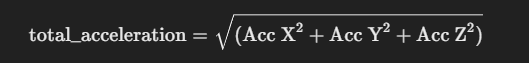


In [25]:
# Calculate total acceleration
data['total_acceleration'] = np.sqrt(data['Acc X']**2 + data['Acc Y']**2 + data['Acc Z']**2)


d. Calculate Distance Traveled Between Points Use the Haversine formula for distance calculation:

In [27]:
# Calculate the next Longitude and Latitude values
data['next_longitude'] = data['Longitude'].shift(-1)
data['next_latitude'] = data['Latitude'].shift(-1)

# Calculate distance traveled between points using the Haversine formula
data['distance_traveled'] = data.apply(
    lambda row: haversine(row['Longitude'], row['Latitude'],
                          row['next_longitude'],
                          row['next_latitude']) if pd.notnull(row['next_longitude']) and pd.notnull(row['next_latitude']) else 0,
    axis=1
)

# Drop the helper columns
data.drop(columns=['next_longitude', 'next_latitude'], inplace=True)


**5.Create Time-Based Features**

Create rolling averages and moving variances for accelerometer and gyroscope data.

In [28]:
window_size = 10  # Define rolling window size

# Rolling mean and variance for accelerometer data
data['acc_x_rolling_mean'] = data['Acc X'].rolling(window=window_size).mean()
data['acc_y_rolling_mean'] = data['Acc Y'].rolling(window=window_size).mean()
data['acc_z_rolling_mean'] = data['Acc Z'].rolling(window=window_size).mean()

data['acc_x_rolling_var'] = data['Acc X'].rolling(window=window_size).var()
data['acc_y_rolling_var'] = data['Acc Y'].rolling(window=window_size).var()
data['acc_z_rolling_var'] = data['Acc Z'].rolling(window=window_size).var()

# Rolling mean and variance for gyroscope data
data['gyro_x_rolling_mean'] = data['gyro_x'].rolling(window=window_size).mean()
data['gyro_y_rolling_mean'] = data['gyro_y'].rolling(window=window_size).mean()
data['gyro_z_rolling_mean'] = data['gyro_z'].rolling(window=window_size).mean()

data['gyro_x_rolling_var'] = data['gyro_x'].rolling(window=window_size).var()
data['gyro_y_rolling_var'] = data['gyro_y'].rolling(window=window_size).var()
data['gyro_z_rolling_var'] = data['gyro_z'].rolling(window=window_size).var()


**6.Investigate Feature Importance Use correlation coefficients to analyze feature importance.**

                    total_acceleration     Acc X     Acc Y     Acc Z  \
total_acceleration            1.000000  0.004208  0.074578 -0.028909   
Acc X                         0.004208  1.000000 -0.171219  0.166317   
Acc Y                         0.074578 -0.171219  1.000000 -0.305406   
Acc Z                        -0.028909  0.166317 -0.305406  1.000000   
gyro_x                       -0.036652  0.007758  0.060835  0.023364   
gyro_y                        0.013186 -0.100550  0.037253 -0.019459   
gyro_z                       -0.033823  0.042532 -0.037807 -0.019023   
Speed                        -0.018831 -0.018124 -0.007962 -0.015702   
speed_change                  0.005096  0.009910  0.001037  0.001482   
sudden_stop                        NaN       NaN       NaN       NaN   
heading_change                0.009856  0.011950  0.003032  0.001577   

                      gyro_x    gyro_y    gyro_z     Speed  speed_change  \
total_acceleration -0.036652  0.013186 -0.033823 -0.018831 

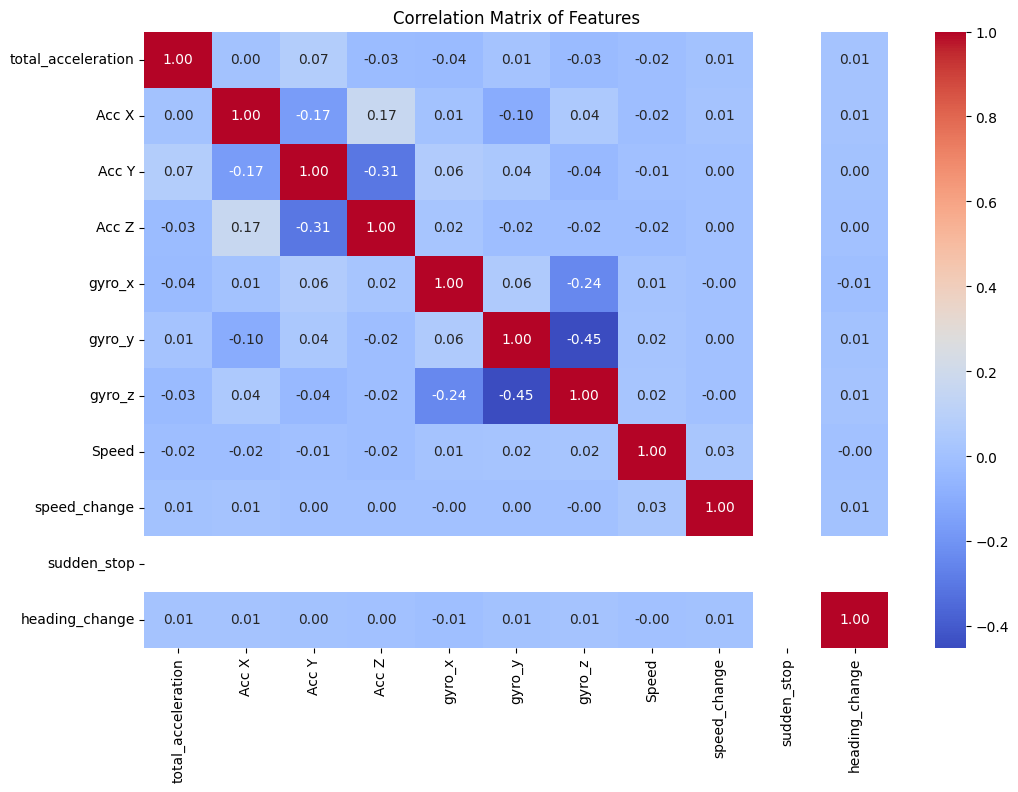

Pearson Correlation (Total Acceleration vs Acc X): 0.004207987658121692
Pearson Correlation (Total Acceleration vs Acc Y): 0.0745783932337573
Pearson Correlation (Total Acceleration vs Acc Z): -0.028909347853549018
Pearson Correlation (Total Acceleration vs Speed): -0.018831495064372195
Pearson Correlation (Total Acceleration vs total_acceleration): 0.9999999999999998


In [29]:
# Calculate correlation matrix for important features
corr_matrix = data[['total_acceleration', 'Acc X', 'Acc Y', 'Acc Z',
                    'gyro_x', 'gyro_y', 'gyro_z', 'Speed',
                    'speed_change', 'sudden_stop', 'heading_change']].corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Calculate Pearson correlation coefficients for feature importance
for feature in ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'total_acceleration']:
    pearson_corr = pearsonr(data['total_acceleration'], data[feature])[0]
    print(f"Pearson Correlation (Total Acceleration vs {feature}):", pearson_corr)


7.Final Review of Data After performing feature engineering, review the dataset.



In [30]:
# Display the dataset with new features
print(data.head())

# Save the augmented dataset to a new CSV file
data.to_csv('augmented_smartphone_data.csv', index=False)


   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x  ...  acc_z_rolling_mean  acc_x_rolling_var  \
0 -0.282934      352 -0.036306  ...                 NaN                NaN   
1  0.108889      352  0.035776  ...                 NaN                NaN   
2 -0.534985      352 -0.011871  ...                 NaN                NaN   
3 -0.350396      352 -0.017980  ...                 NaN                NaN   
4 -0.494085      352  0.011342  ...                 NaN                NaN   

   acc_y_rolling_var  acc_z_rolling_var  gyro_x_rolling_mean  \
0                NaN  

# TASK 2

Z-Score-Based Outlier Detection
The Z-score method is a statistical technique used to identify outliers in a dataset. The Z-score measures how many standard deviations a data point is from the mean of the dataset. A Z-score can be calculated using the formula:


A Z-score greater than 3 or less than -3 typically indicates that the data point is an outlier, assuming a normal distribution. This method is effective in identifying anomalies, especially in datasets where the underlying distribution is Gaussian.
Implementing Z-Score-Based Outlier Detection
Here’s how to implement Z-score-based outlier detection in Python using your dataset:

Step 1: Load Your Dataset


In [31]:
# Load the dataset
data = pd.read_csv('augmented_smartphone_data.csv')


Step 2: Calculate Z-Scores

You can calculate Z-scores for the features you're interested in. For this example, let's calculate Z-scores for Speed, Acc X, Acc Y, Acc Z, and total_acceleration:

In [32]:
from scipy.stats import zscore

# Calculate Z-scores for specified features
features_to_check = ['Speed', 'Acc X', 'Acc Y', 'Acc Z', 'total_acceleration']
data_z_scores = data[features_to_check].apply(zscore)


Step 3: Flag Anomalies

You can define a threshold (commonly 3) to flag anomalies based on their Z-scores:

In [33]:
# Define the threshold for detecting outliers
threshold = 3

# Create a DataFrame to hold the anomaly flags
anomaly_flags = pd.DataFrame(index=data.index)

# Flag anomalies
for feature in features_to_check:
    anomaly_flags[feature + '_anomaly'] = np.where(np.abs(data_z_scores[feature]) > threshold, 1, 0)

# Combine the anomaly flags with the original dataset
data = pd.concat([data, anomaly_flags], axis=1)


Summary of Code

Import Libraries: You need pandas and numpy, and scipy.stats.zscore for Z-score calculations.
Load Dataset: Ensure your dataset is loaded into a DataFrame.
Calculate Z-scores: Apply the Z-score function to the selected features.

Flag Anomalies: Compare the absolute Z-scores against the threshold, flagging data points accordingly.

Final Output
You can now check your dataset, which will have new columns indicating anomalies based on the Z-score method:

In [34]:
# Display the dataset with anomaly flags
print(data.head())


   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x  ...  gyro_y_rolling_mean  gyro_z_rolling_mean  \
0 -0.282934      352 -0.036306  ...                  NaN                  NaN   
1  0.108889      352  0.035776  ...                  NaN                  NaN   
2 -0.534985      352 -0.011871  ...                  NaN                  NaN   
3 -0.350396      352 -0.017980  ...                  NaN                  NaN   
4 -0.494085      352  0.011342  ...                  NaN                  NaN   

   gyro_x_rolling_var  gyro_y_rolling_var  gyro_z_rolling_var  Speed

# TASK 3

Visualizing anomalies is an effective way to understand their impact on your dataset. Here’s a step-by-step guide to create time-series plots and scatter plots for Z-score and IQR anomaly detection results, and how to prepare a joint report comparing the two methods.




Step 1: Visualize Anomalies Using Time-Series Plots

1.Import Required Libraries for Visualization:

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


2.Create Time-Series Plots:
You can plot the features of interest over time, highlighting anomalies detected by both Z-score and IQR methods.

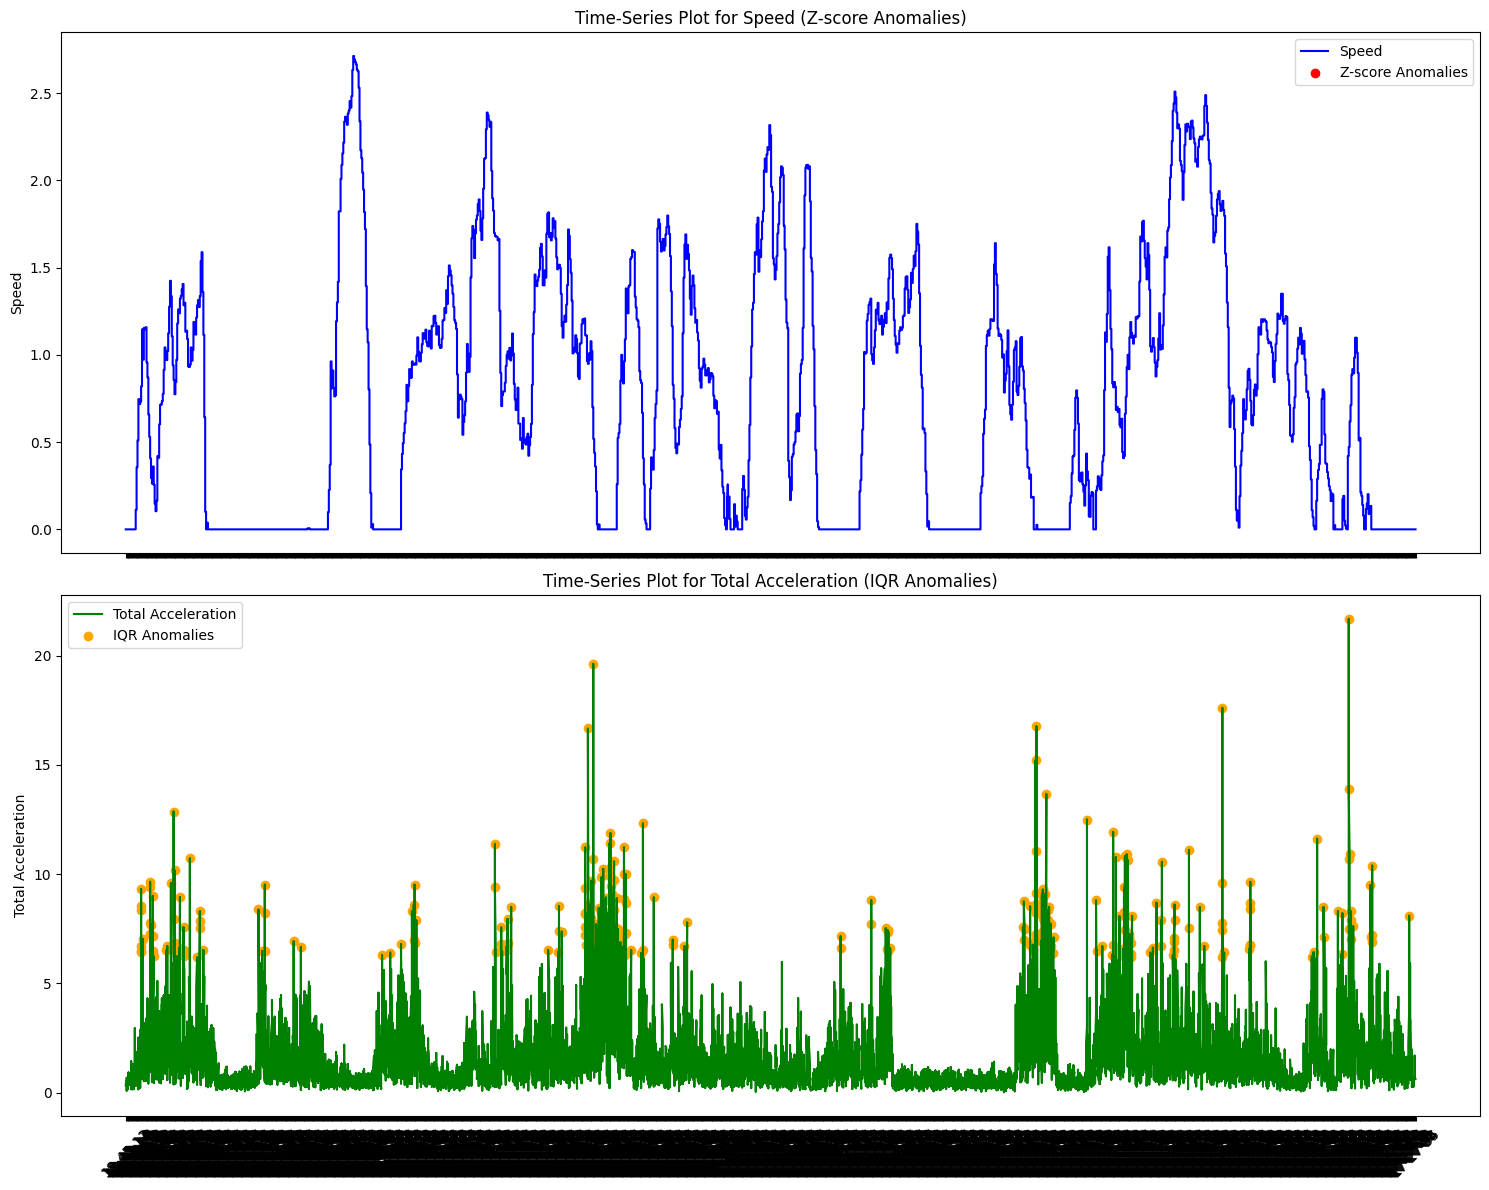

In [36]:
# Assuming you have the IQR anomaly flags in the same format as Z-score
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Time-series plot for Speed
axs[0].plot(data['Time'], data['Speed'], label='Speed', color='blue')
axs[0].scatter(data['Time'][data['Speed_anomaly'] == 1],
                data['Speed'][data['Speed_anomaly'] == 1],
                color='red', label='Z-score Anomalies', marker='o')
axs[0].set_title('Time-Series Plot for Speed (Z-score Anomalies)')
axs[0].set_ylabel('Speed')
axs[0].legend()

# Time-series plot for total_acceleration
axs[1].plot(data['Time'], data['total_acceleration'], label='Total Acceleration', color='green')
axs[1].scatter(data['Time'][data['total_acceleration_anomaly'] == 1],
                data['total_acceleration'][data['total_acceleration_anomaly'] == 1],
                color='orange', label='IQR Anomalies', marker='o')
axs[1].set_title('Time-Series Plot for Total Acceleration (IQR Anomalies)')
axs[1].set_ylabel('Total Acceleration')
axs[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Step 2: Create Scatter Plots**

Scatter plots can be used to visualize the relationship between two features, such as Speed and Total Acceleration, while marking the anomalies detected by both methods.

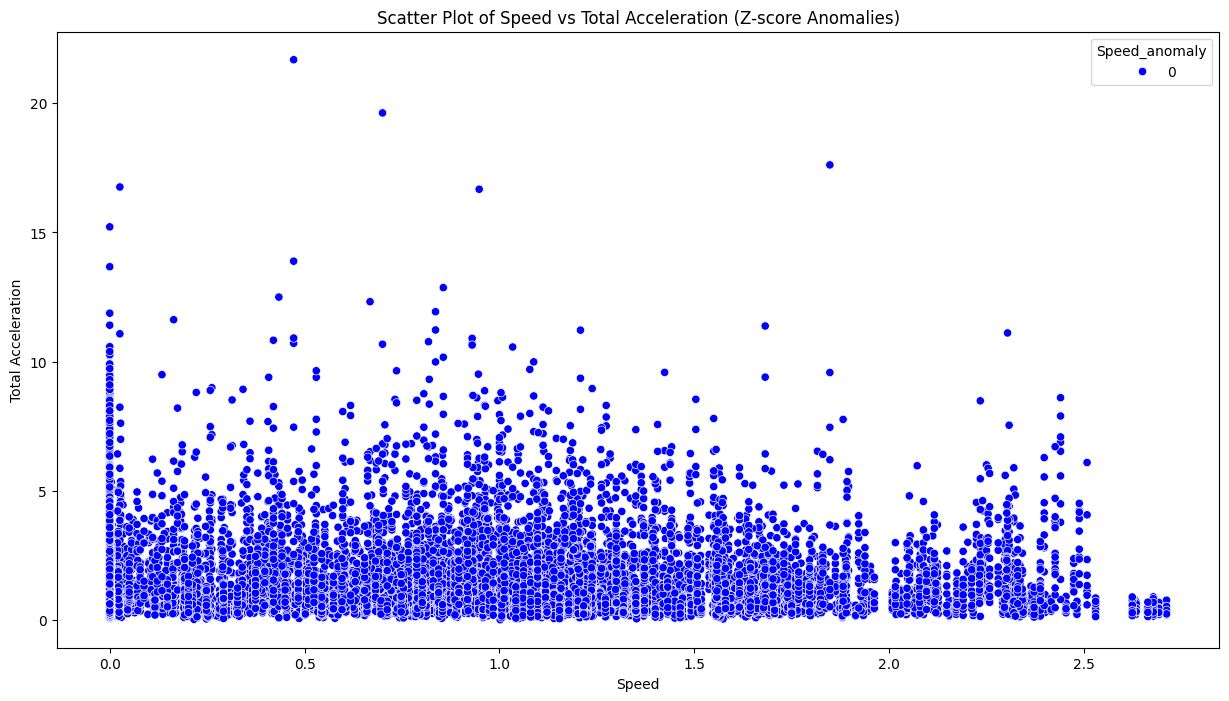

In [37]:
plt.figure(figsize=(15, 8))

# Scatter plot of Speed vs Total Acceleration
sns.scatterplot(data=data, x='Speed', y='total_acceleration', hue='Speed_anomaly',
                palette={0: 'blue', 1: 'red'}, legend='full')
plt.title('Scatter Plot of Speed vs Total Acceleration (Z-score Anomalies)')
plt.xlabel('Speed')
plt.ylabel('Total Acceleration')
plt.show()


# Task 4

**Z-Score Threshold Re-evaluation and Comparative Report**

This task involves re-evaluating the Z-score thresholds for each sensor, experimenting with different thresholds, and testing the impact of standardization techniques. Here’s how to approach it step by step:

**Step 1: Re-evaluate Z-Score Threshold Values**

1.Calculate Z-Scores for Each Sensor:
python

In [38]:
from scipy.stats import zscore

# Calculate Z-scores for the selected features
data['Acc_X_Z'] = zscore(data['Acc X'])
data['Acc_Y_Z'] = zscore(data['Acc Y'])
data['Acc_Z_Z'] = zscore(data['Acc Z'])
data['Speed_Z'] = zscore(data['Speed'])
data['Total_Acceleration_Z'] = zscore(data['total_acceleration'])


2.Test Different Thresholds:

In [39]:
thresholds = [2, 2.5, 3]
for threshold in thresholds:
    for feature in ['Acc_X_Z', 'Acc_Y_Z', 'Acc_Z_Z', 'Speed_Z', 'Total_Acceleration_Z']:
        data[f'{feature}_anomaly_{threshold}'] = (np.abs(data[feature]) > threshold).astype(int)

# Example to see the effect
print(data[['Time', 'Acc X', 'Acc_Y_Z_anomaly_2', 'Acc_Y_Z_anomaly_2.5', 'Acc_Y_Z_anomaly_3']].head())


       Time     Acc X  Acc_Y_Z_anomaly_2  Acc_Y_Z_anomaly_2.5  \
0  18-45-12  0.046402                  0                    0   
1  18-45-12 -0.136978                  0                    0   
2  18-45-13 -0.045355                  0                    0   
3  18-45-13  0.242089                  0                    0   
4  18-45-13 -0.230234                  0                    0   

   Acc_Y_Z_anomaly_3  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


**Step 2: Experiment with Standardization Techniques**

1.Apply Min-Max Scaling:

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Select features for scaling
features_to_scale = ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'total_acceleration']
data_scaled = data.copy()
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Calculate Z-scores on scaled data
data_scaled['Acc_X_Z'] = zscore(data_scaled['Acc X'])
data_scaled['Acc_Y_Z'] = zscore(data_scaled['Acc Y'])
data_scaled['Acc_Z_Z'] = zscore(data_scaled['Acc Z'])
data_scaled['Speed_Z'] = zscore(data_scaled['Speed'])
data_scaled['Total_Acceleration_Z'] = zscore(data_scaled['total_acceleration'])

# Test different thresholds on scaled data
for threshold in thresholds:
    for feature in ['Acc_X_Z', 'Acc_Y_Z', 'Acc_Z_Z', 'Speed_Z', 'Total_Acceleration_Z']:
        data_scaled[f'{feature}_anomaly_{threshold}'] = (np.abs(data_scaled[feature]) > threshold).astype(int)

# Example to see the effect
print(data_scaled[['Time', 'Acc X', 'Acc_X_Z_anomaly_2', 'Acc_X_Z_anomaly_2.5', 'Acc_X_Z_anomaly_3']].head())


       Time     Acc X  Acc_X_Z_anomaly_2  Acc_X_Z_anomaly_2.5  \
0  18-45-12  0.458796                  0                    0   
1  18-45-12  0.449292                  0                    0   
2  18-45-13  0.454040                  0                    0   
3  18-45-13  0.468938                  0                    0   
4  18-45-13  0.444458                  0                    0   

   Acc_X_Z_anomaly_3  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


**Step 3: Compare the Results**

1.Compare Anomalies Detected by Different Methods and Thresholds:

In [41]:
# Count anomalies detected
anomaly_counts = {}
for threshold in thresholds:
    anomaly_counts[threshold] = {
        'Acc X': data[f'Acc_X_Z_anomaly_{threshold}'].sum(),
        'Acc Y': data[f'Acc_Y_Z_anomaly_{threshold}'].sum(),
        'Acc Z': data[f'Acc_Z_Z_anomaly_{threshold}'].sum(),
        'Speed': data[f'Speed_Z_anomaly_{threshold}'].sum(),
        'Total Acceleration': data[f'Total_Acceleration_Z_anomaly_{threshold}'].sum(),
    }

# Display counts
print(anomaly_counts)


{2: {'Acc X': 822, 'Acc Y': 838, 'Acc Z': 815, 'Speed': 609, 'Total Acceleration': 693}, 2.5: {'Acc X': 475, 'Acc Y': 471, 'Acc Z': 489, 'Speed': 69, 'Total Acceleration': 441}, 3: {'Acc X': 274, 'Acc Y': 280, 'Acc Z': 293, 'Speed': 0, 'Total Acceleration': 286}}


# Task 5

Performance Analysis for Isolation Forest

This task involves implementing the Isolation Forest algorithm for anomaly detection and comparing its results with the previously implemented statistical methods: IQR and Z-Score. Below are the detailed steps to perform this analysis.

Step 1: Implement Isolation Forest

1.Import Necessary Libraries:


In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2.**Prepare the Dataset:**Ensure you have a binary label for anomalies (e.g., true labels from IQR or Z-score results). If you do not have a labeled dataset, you may need to manually label a portion for evaluation.

In [43]:
# Example: Assume we use Z-Score based anomaly detection results as true labels
data['true_anomaly'] = (data['Acc_X_Z_anomaly_3'] | data['Acc_Y_Z_anomaly_3'] |
                        data['Acc_Z_Z_anomaly_3'] | data['Speed_Z_anomaly_3']).astype(int)


3**.Feature Selection:** Select relevant features for the Isolation Forest model. You may choose the original sensor readings or the engineered features.

In [44]:
features = ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'total_acceleration']
X = data[features]


**4.Fit Isolation Forest:**

In [45]:
# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on expected outlier proportion
data['iso_forest_anomaly'] = iso_forest.fit_predict(X)

# Convert predictions to binary (1 for anomaly, 0 for normal)
data['iso_forest_anomaly'] = (data['iso_forest_anomaly'] == -1).astype(int)


Step 2: Compare with Statistical **Methods**

1.Confusion Matrix and Classification Report:

In [46]:
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(data['true_anomaly'], data['iso_forest_anomaly'])
class_report = classification_report(data['true_anomaly'], data['iso_forest_anomaly'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[12815   744]
 [    9   681]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     13559
           1       0.48      0.99      0.64       690

    accuracy                           0.95     14249
   macro avg       0.74      0.97      0.81     14249
weighted avg       0.97      0.95      0.96     14249



2.Visualize Confusion Matrix:

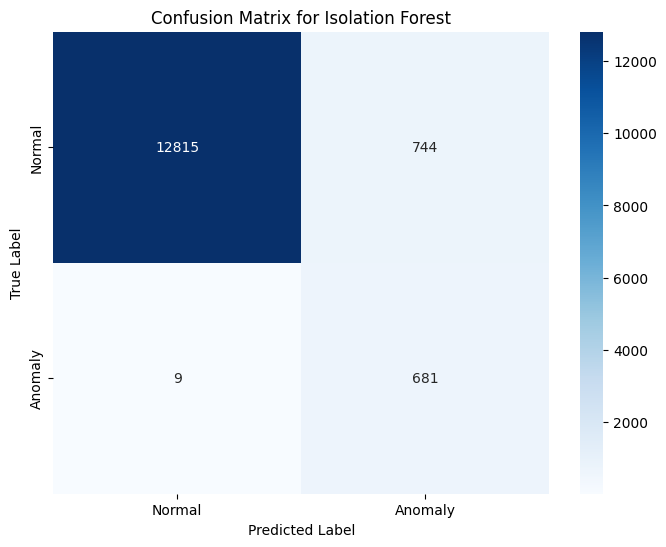

In [47]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix for Isolation Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Step 3: Performance Metrics Comparison**

3.1 Calculate Performance Metrics

Calculate and compare precision, recall, F1-score, and accuracy for IQR, Z-score, and Isolation Forest:

Create the IQR Anomaly Detection Column
This step involves calculating the IQR for a specific feature (e.g., total_acceleration) and flagging anomalies based on that.

In [57]:
# Calculate IQR for total acceleration
Q1 = data['total_acceleration'].quantile(0.25)
Q3 = data['total_acceleration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag anomalies in the 'total_acceleration' column
data['iqr_anomaly'] = ((data['total_acceleration'] < lower_bound) |
                       (data['total_acceleration'] > upper_bound)).astype(int)

# Verify that the column has been created
print(data[['total_acceleration', 'iqr_anomaly']].head())


   total_acceleration  iqr_anomaly
0            0.317840            0
1            0.404996            0
2            0.546759            0
3            0.432064            0
4            0.545221            0


Create the Z-Score Anomaly Detection Column
This involves calculating the Z-scores for the same or different features and flagging anomalies based on a specified Z-score threshold.

In [58]:
from scipy.stats import zscore

# Calculate Z-scores for total acceleration
data['total_acceleration_z'] = zscore(data['total_acceleration'])

# Flag anomalies based on Z-score threshold
threshold = 3  # You can experiment with different thresholds (e.g., 2, 2.5, 3)
data['z_score_anomaly'] = (np.abs(data['total_acceleration_z']) > threshold).astype(int)

# Verify that the column has been created
print(data[['total_acceleration', 'z_score_anomaly']].head())


   total_acceleration  z_score_anomaly
0            0.317840                0
1            0.404996                0
2            0.546759                0
3            0.432064                0
4            0.545221                0


In [59]:
# Use the created anomaly columns
iqr_results = data['iqr_anomaly']          # This column should now exist
z_score_results = data['z_score_anomaly']  # This column should now exist

# Calculate performance metrics
performance_metrics = {
    'Isolation Forest': calculate_metrics(data['true_anomaly'], data['iso_forest_anomaly']),
    'IQR': calculate_metrics(data['true_anomaly'], iqr_results),
    'Z-Score': calculate_metrics(data['true_anomaly'], z_score_results),
}

# Display performance metrics
metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)


                  Accuracy  Precision    Recall  F1 Score
Isolation Forest  0.947154   0.477895  0.986957  0.643972
IQR               0.966454   0.621839  0.784058  0.693590
Z-Score           0.971507   0.996503  0.413043  0.584016


Step 4: Final Analysis and Report
4.1 Analyze Results
Compare the performance metrics of Isolation Forest with IQR and Z-Score. Analyze which method performed better based on precision, recall, and overall accuracy.

4.2 Visualize Performance Metrics
Create a bar plot for performance metrics comparison:

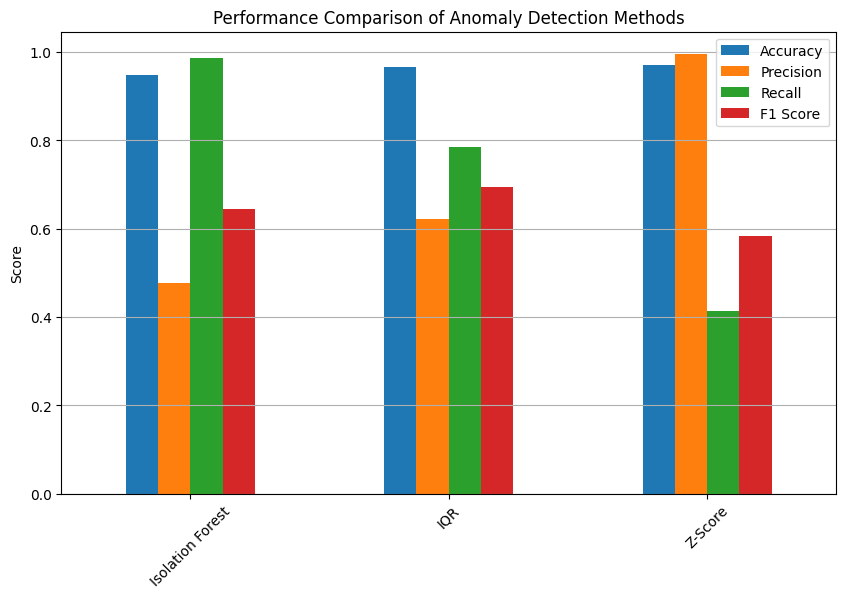

In [60]:
# Bar plot for performance metrics comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison of Anomaly Detection Methods')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
